### k-Nearest Neighbors classification

**Statistical Learning** refers to collection of mathematical and computation tools to understand data

**supervised learning** estimates or predicts an output based on one or more inputs.
- **inputs** have many names such as: 
    - predictors, 
    - independent varaiables,
    - features,
    - variables.
- **outputs** have many names such as:
     - response variables
     - dependent variables
     
**Regression problems**: when the output is quantitative (e.g. nbr that measures weight or height)

**Classification problems**: when the response is qualitative (yes or no, red or green)

** K-Nearest Neighbors classifier (KNN)**: Given a positive integer k, say 5, and a new data point, it first identifies those k points in the data that are nearest to the point and classifies the new data point as belonging to the most common class among those k neighbors.

#### Finding the Euclidean distance between two points:
From the mathematical perspective: it will be nicer to use **column vectors**, but we will be using **row vectors**, because they're easier to deal with in NumPy

In [1]:
import numpy as np

def distance(p1, p2):
    """Find the distance between p1 and p2."""
    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1, p2)

4.2426406871192848

#### Majority Vote

Given an arrary or sequence of votes, we determine how many times each elements occurs then return the most commom element

In [2]:
import random

def majority_vote(votes):
    """
    xxx
    """
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
    winners =[]
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
            
    return random.choice(winners)

In [3]:
votes =[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
winner = majority_vote(votes)
winner

3

###### mode of a numpy array

the most commonly occurring element in a sequence
is called **mode** in statistics.

**scipy.stats.mstats.mode(a, axis=0)**-> returns an array of the modal (most common) value in the passed array.If there is more than one such value, only the first is returned. The bin-count for the modal bins is also returned
a: array_like

In [4]:
import scipy.stats as ss

def majority_vote_short(votes):
    """
    Return the most common element in votes.
    """
    mode, count = ss.mstats.mode(votes)
    return mode

In [5]:
votes =[1,2,3,1,2,3,1,2,3,3,3,3,2,2,2]
majority_vote_short(votes)


array([ 2.])

### Finding Nearest Neighbors

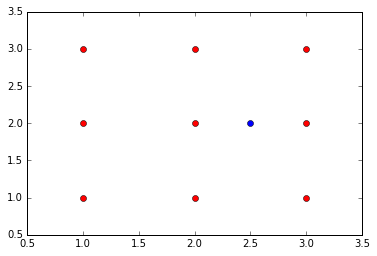

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def find_nearest_neighbors(p, points, k=5):
    """Find the k nearest neighbors of point p and return their indices."""
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]
    
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p = np.array([2.5, 2])

plt.plot(points[:,0],points[:, 1], "ro" )
plt.plot(p[0], p[1],'bo')
plt.axis([0.5, 3.5,0.5,3.5])
plt.show()

In [8]:
ind  = find_nearest_neighbors(p, points, 3); print(points[ind])

[[2 2]
 [3 2]
 [2 1]]


In [9]:
def knn_predict(p, points,outcomes, k=5):
    """"""
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote(outcomes[ind])

In [10]:
#class 0 and class 1
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [11]:
knn_predict(np.array([2.5, 2.7]), points, outcomes, k=2)

1

In [12]:
knn_predict(np.array([1.0, 2.7]), points, outcomes, k=2)

0

### Generate synthetic data

objective: write a function that generates synthethic data exactly two end points, where the first end points are from class 0 and the second end points are from class1.

In this case, we'll generate predictors from two
bivariate normal distributions. 

Bivariate means 2 variables, like x and y. If we want to generate x variables, then we'd be dealing with univariate data.

In [13]:
# specify the mean and the standard deviation:
# generate 5 rows and 2 columns
ss.norm(0,1).rvs((5,2))


array([[ 1.15736554, -1.41058327],
       [ 0.64884319, -0.0478005 ],
       [-0.20492971,  0.50458113],
       [-0.81750431,  0.68195856],
       [-1.842202  , -1.42929493]])

In [14]:
ss.norm(1,0).rvs((5,2))

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [15]:
np.concatenate((ss.norm(0,1).rvs((5,2)), ss.norm(1,1).rvs((5,2))), axis=0)

array([[-0.14237398, -0.4977535 ],
       [-0.8213907 , -0.32850002],
       [ 0.06556622,  1.59622678],
       [ 0.68222941, -0.95840627],
       [-0.5711569 ,  1.54685252],
       [ 0.79438328,  0.73451097],
       [ 2.35348351,  2.33468284],
       [ 0.4114391 ,  0.74464226],
       [ 0.37549654,  0.34695897],
       [ 1.30409785, -0.63341077]])

In [16]:
def generate_synth_data(n=50):
    """Create two sets of points from bivariate normal ditribution."""
    points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))), axis=0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(0, n)))
    return (points, outcomes)

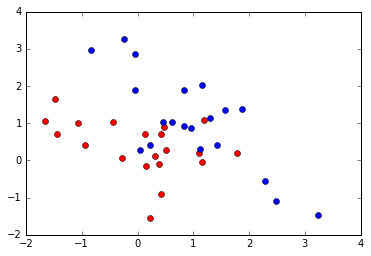

In [17]:
n =20
(points, outcomes) = generate_synth_data(n) 

plt.figure()
plt.plot(points[:n,0], points[:n,1], "ro")
plt.plot(points[n:,0], points[n:,1], "bo")
